# Explanation of Optical Wave Breaking

The Nonlinear Schrodinger Equation is given by:

$\frac{\partial A}{\partial z}=-i \frac{\beta_2}{2} \frac{\partial^2 A}{\partial T^2}+i\gamma|A|^2A$.

If $\beta_2<0$, meaning that we have anormalous dispersion where blue light propagates faster than red light, and $\gamma>0$, we can achieve "solitons"; optical pulses, which retain their shape as they propagate. 

But what happens if $\beta_2>0$ along with $\gamma>0$? 

Now the dispersion is "normal", causing red light moves faster than blue light. Furthermore, SPM will generate lots of red light in the front of the pulse and blue light in the back. Therefore, we might expect the push to spread out much quicker with a "rush" of red light in the front.

Link to excellent explanation: 
https://prefetch.eu/know/concept/optical-wave-breaking/

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import custom functions for running SSFM

In [3]:
from ssfm_functions_for_OWB_video import *


## Initialize timebase

In [5]:
N  = 2**12 #Number of points
dt = 0.1e-12 #Time resolution [s] 
carrier_freq_Hz = 193.4e12
time_freq=TimeFreq(N,dt,carrier_freq_Hz)

 ### timeFreq Configuration Parameters ###
Number of points		= 4096
Start time, tmin		= -204.800ps
Stop time, tmax		= 204.800ps
Time resolution		= 0.100ps
  
  Center frequency		= 193.400THz
Start frequency		= -4.999THz
Stop frequency 		= 4.996THz
Frequency resolution 		= 2440.810MHz
   


## Initialize fiber with normal dispersion

In [8]:


#Define fiber parameters
Length          = 132.5      #Fiber length in m

gamma           = 400e-3     #Nonlinearity parameter in 1/W/m 
beta2           = 100e3    #Dispersion in fs^2/m (units typically used when referring to beta2) 
beta2          *= (1e-30)  #Convert fs^2 to s^2 so everything is in SI units
beta_list=[beta2]
alpha_dB_per_m  = 0.0e-3   #Power attenuation coeff in decibel per m. Usual value at 1550nm is 0.2 dB/km
number_of_steps=2**10
#Note:  beta2>0 is normal dispersion with red light pulling ahead, 
#       causing a negative leading chirp
#       
#       beta2<0 is anormalous dispersion with blue light pulling ahead, 
#       causing a positive leading chirp.


#  Initialize class
fiber=FiberSpan(Length,number_of_steps, gamma, beta_list, alpha_dB_per_m)

 ### Characteristic parameters of fiber: ###
Fiber Length [km] 	= 0.1325 
Number of Steps 	= 1024 
dz [m] 	= 0.12939453125 
Fiber gamma [1/W/m] 	= 0.4 
Fiber beta2 [s^2/m] 	= 1e-25 
Fiber beta3 [s^3/m] 	= 0.0 
Fiber beta4 [s^4/m] 	= 0.0 
Fiber beta5 [s^5/m] 	= 0.0 
Fiber beta6 [s^6/m] 	= 0.0 
Fiber beta7 [s^7/m] 	= 0.0 
Fiber beta8 [s^8/m] 	= 0.0 
Fiber alpha_dB_per_m 	= 0.0 
Fiber alpha_Np_per_m 	= 0.0 
Fiber total loss [dB] 	= 0.0 
Raman Model 	= None. (fR,tau1,tau2)=(0.0,0.0,0.0) 
Input Loss [dB] = 0.0 
Output Amplification [dB] = 0.0 
Noise Factor [dB] = -1000.0 
Output Attenuation [dB] = 0.0 
 


## Initialize Gaussian pulse

 ### Input Signal Parameters ###
  Pmax 				= 1.000 W
  Duration 			= 10.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.000 sqrt(W)
   


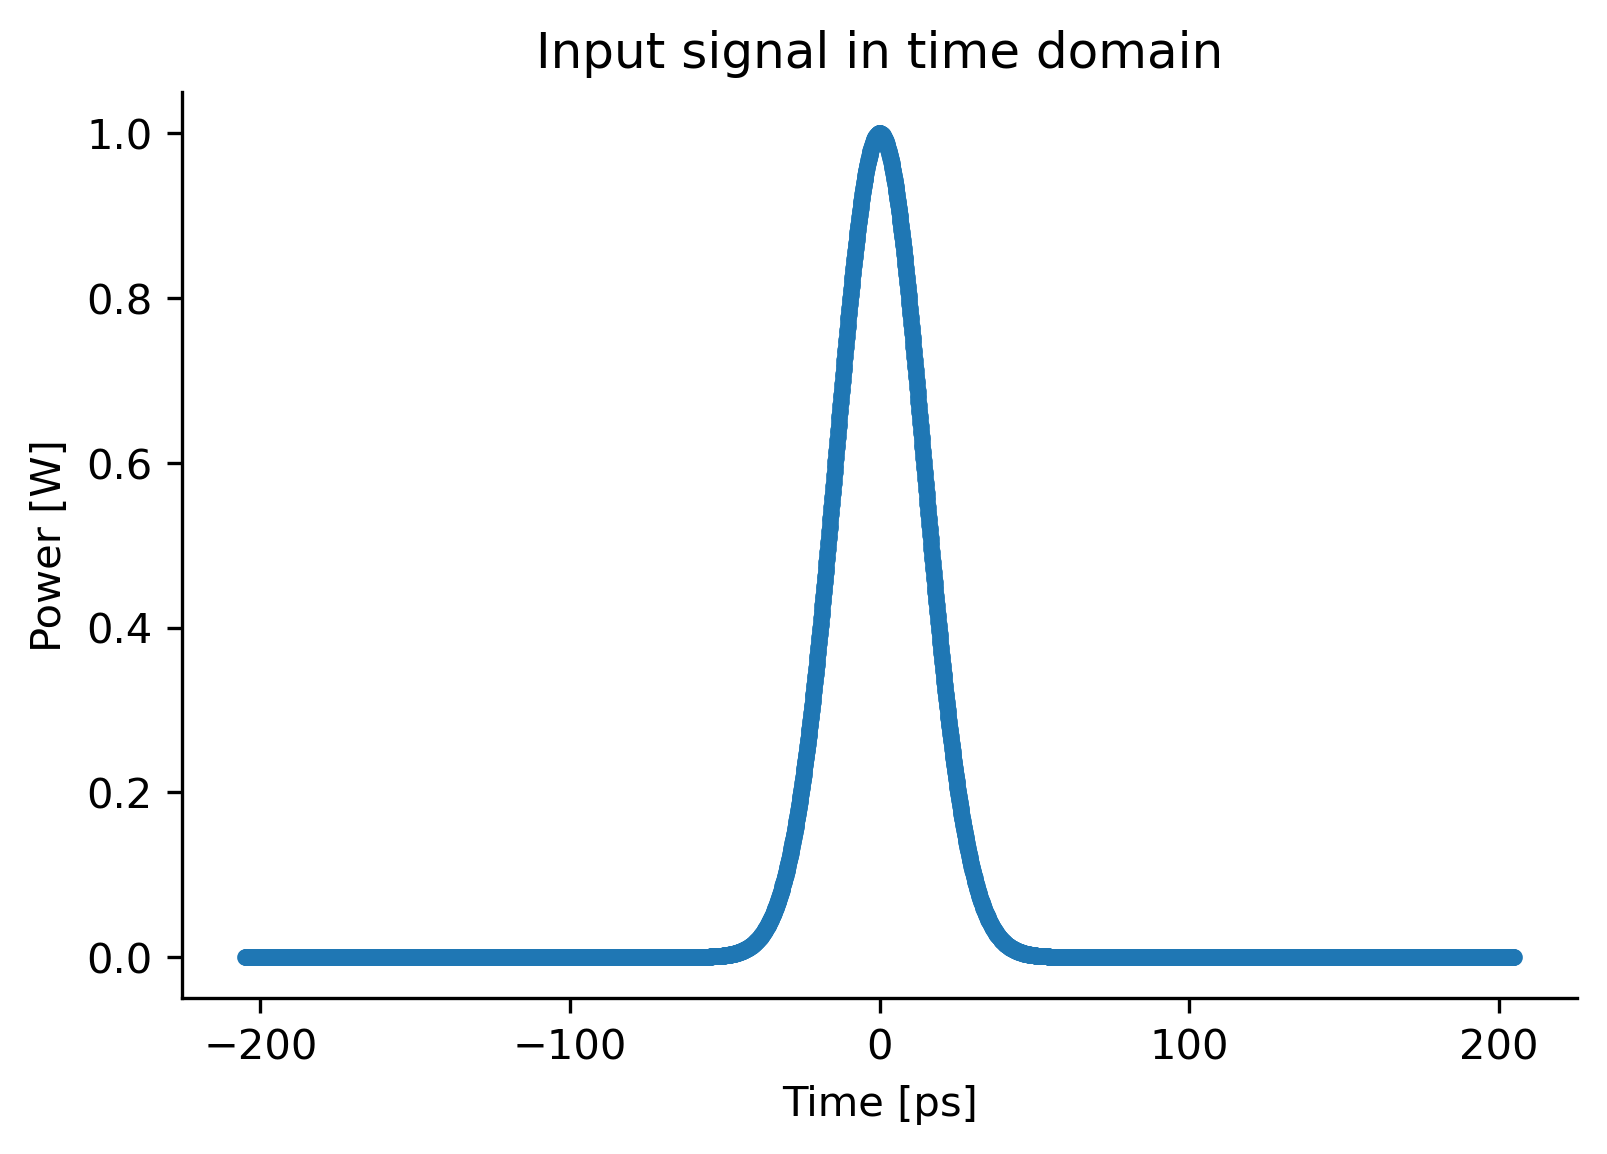

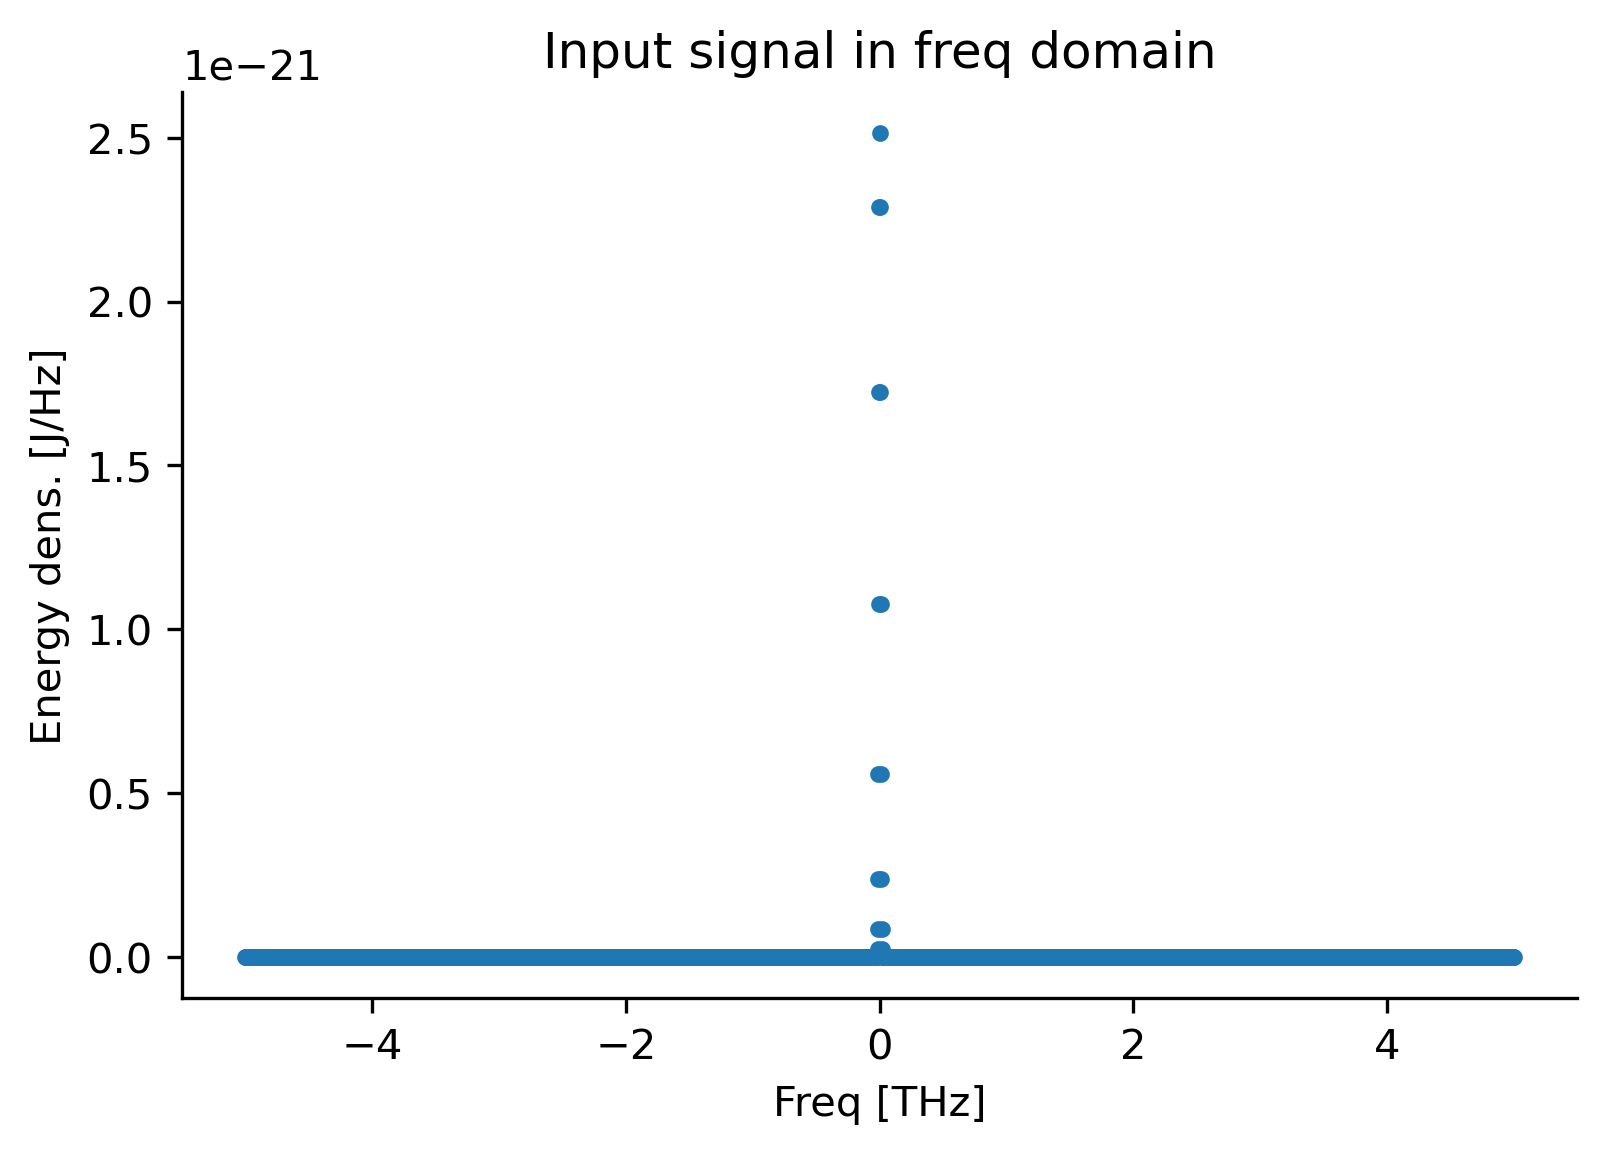

 ### Input Signal Parameters ###
  Pmax 				= 1.000 W
  Duration 			= 10.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.000 sqrt(W)
   


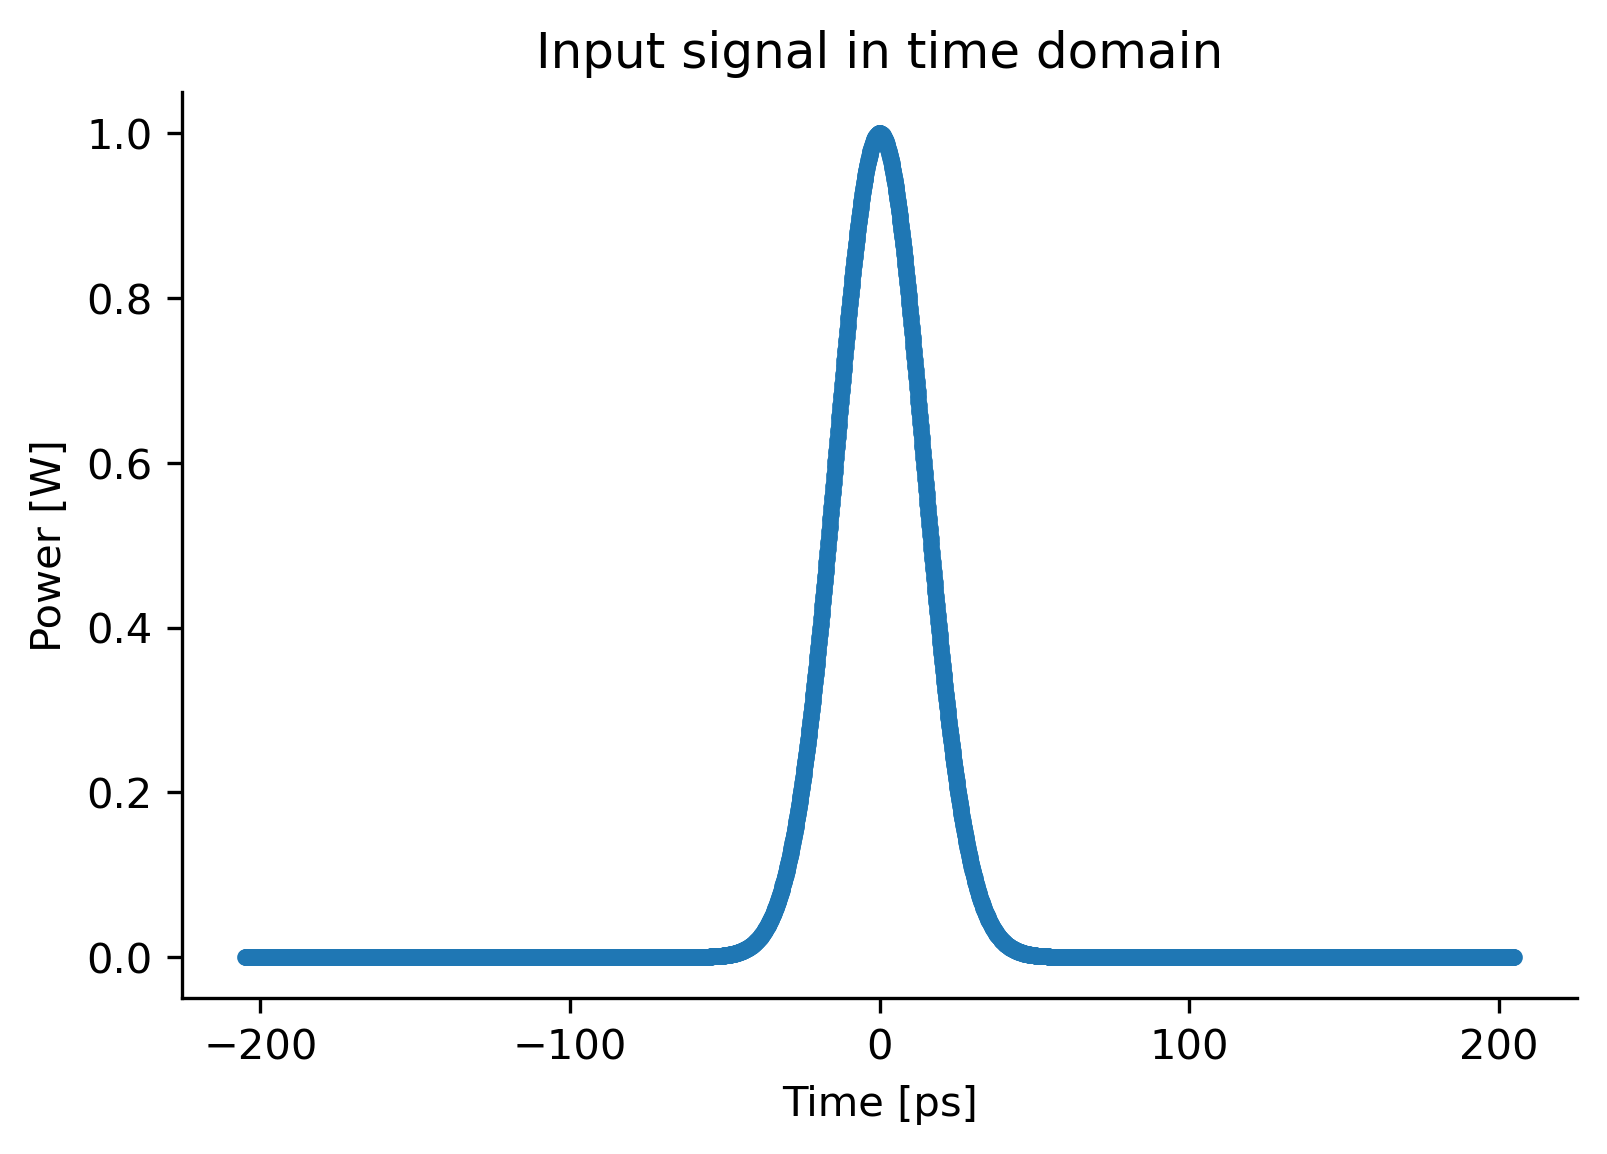

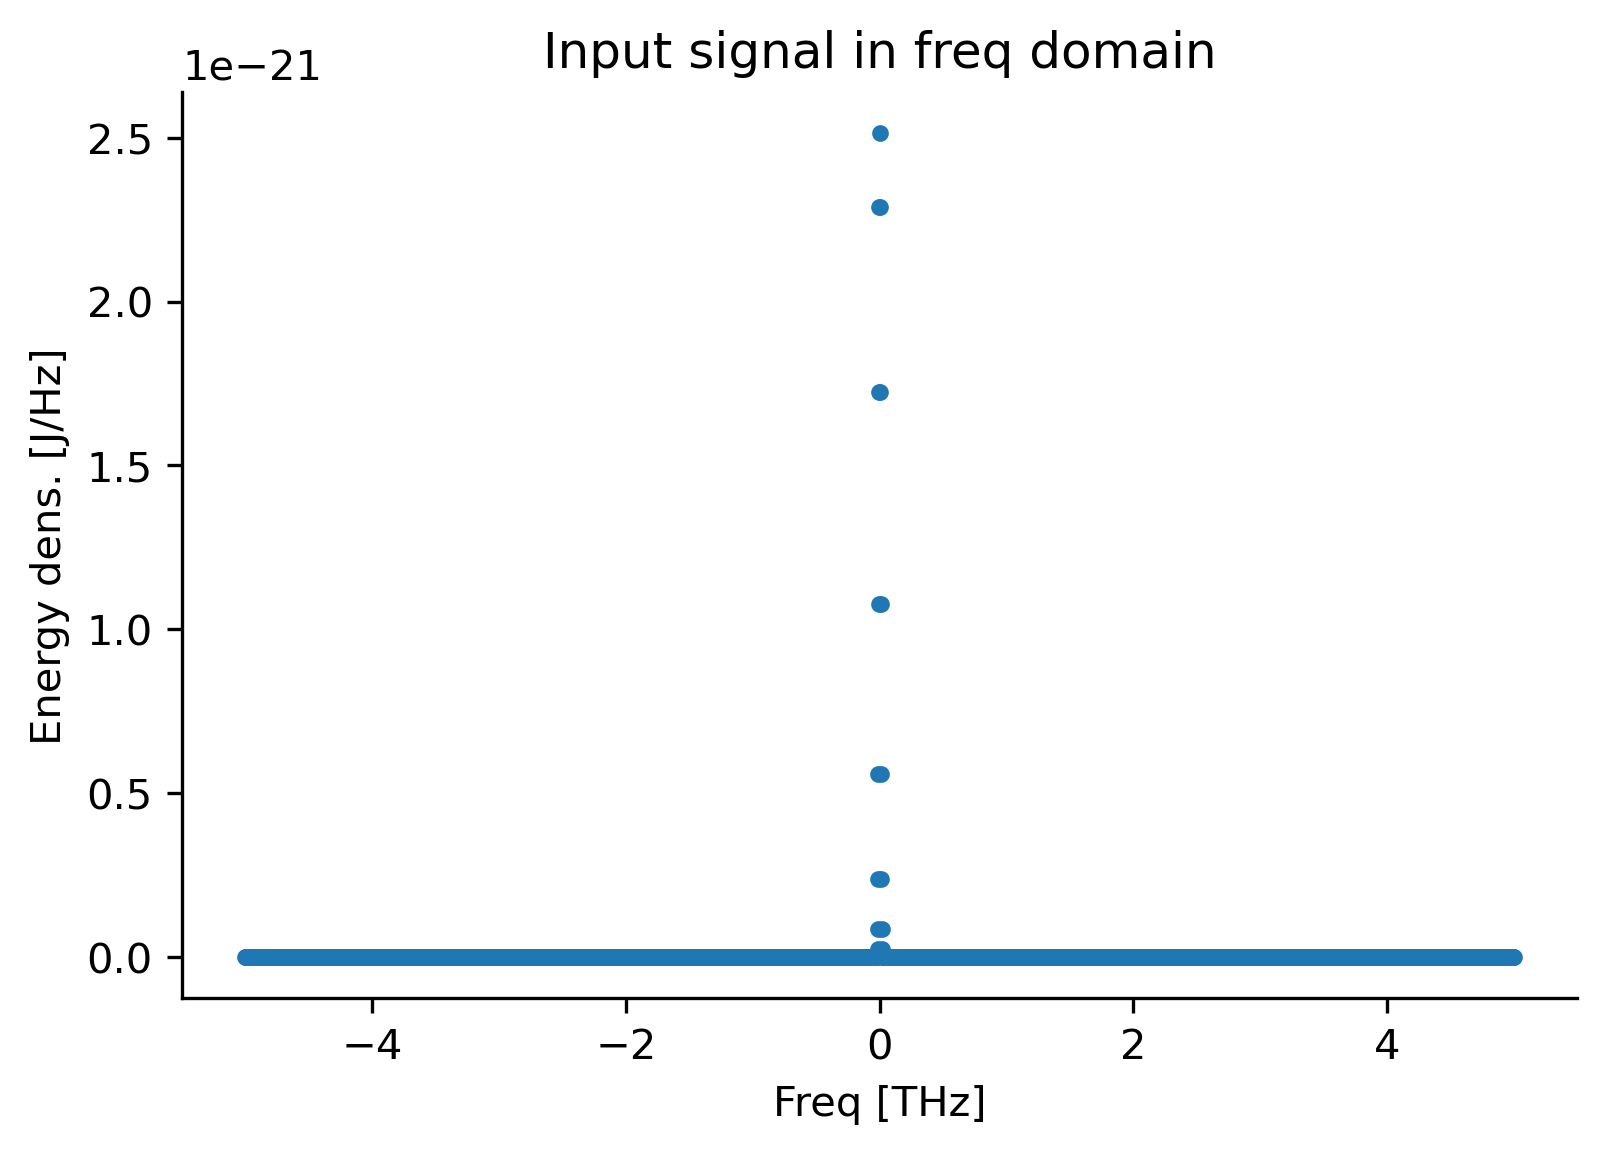

In [12]:
#Initialize Gaussian pulse


testAmplitude = np.sqrt(1)                    #Amplitude in units of sqrt(W)
testDuration  =100*time_freq.time_step    #Pulse 1/e^2 duration [s]
testOffset    = 0                             #Time offset
testChirp = 0                                 #Chirp factor
testCarrierFreq=0                             #Freq. offset
testPulseType='gaussian'                      #'Gaussian', 'square', 'sech'
testOrder = 1                                 #Order of Gaussian pulse
testNoiseAmplitude = 0.0                      #Added ASE noise amplitude


testInputSignal = InputSignal(time_freq, 
                                     testAmplitude ,
                                     testDuration,
                                     testOffset,
                                     testChirp,
                                     testCarrierFreq,
                                     testPulseType,
                                     testOrder,
                                     testNoiseAmplitude)

## Run SSFM to simulate OWB

In [14]:
#https://prefetch.eu/know/concept/optical-wave-breaking/

fiber_link = FiberLink([fiber])

#Run SSFM
ssfm_result_test = SSFM(fiber_link,testInputSignal,experiment_name ="OWB")



########### Initializing SSFM!!! ###########
Current time is 2024-03-04 14:49:20.123019
Current dir is C:\Users\okrarup\OneDrive - Ciena Corporation\Desktop\SSFM folder\NLSE-vector-solver\TutorialVideos\OpticalWaveBreaking-Video\Simulation Results\OWB\2024_3_4_14_49_20\
Starting SSFM loop over 1 fibers
Propagating through fiber number 1 out of 1
Running SSFM with 1024 steps
Finished running SSFM!!!


## Plot results

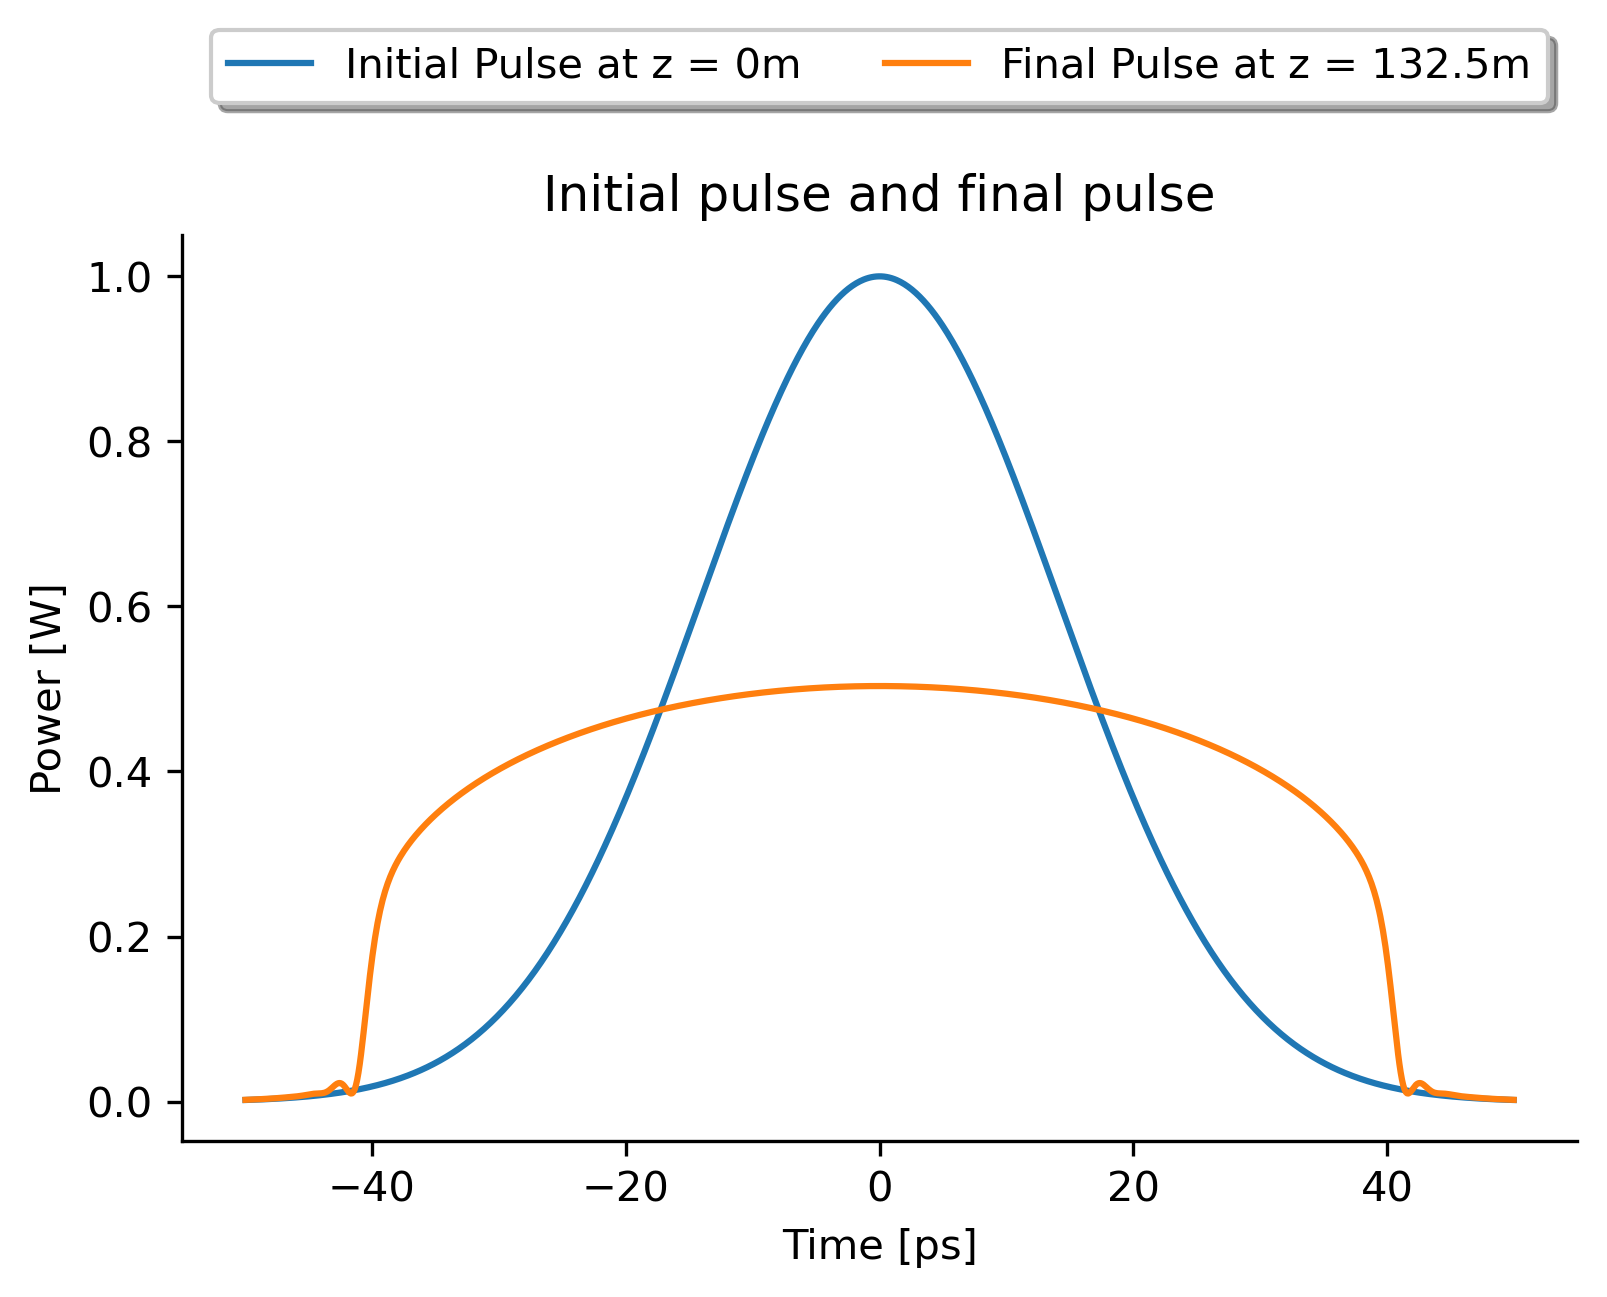

length of zvals = 1025


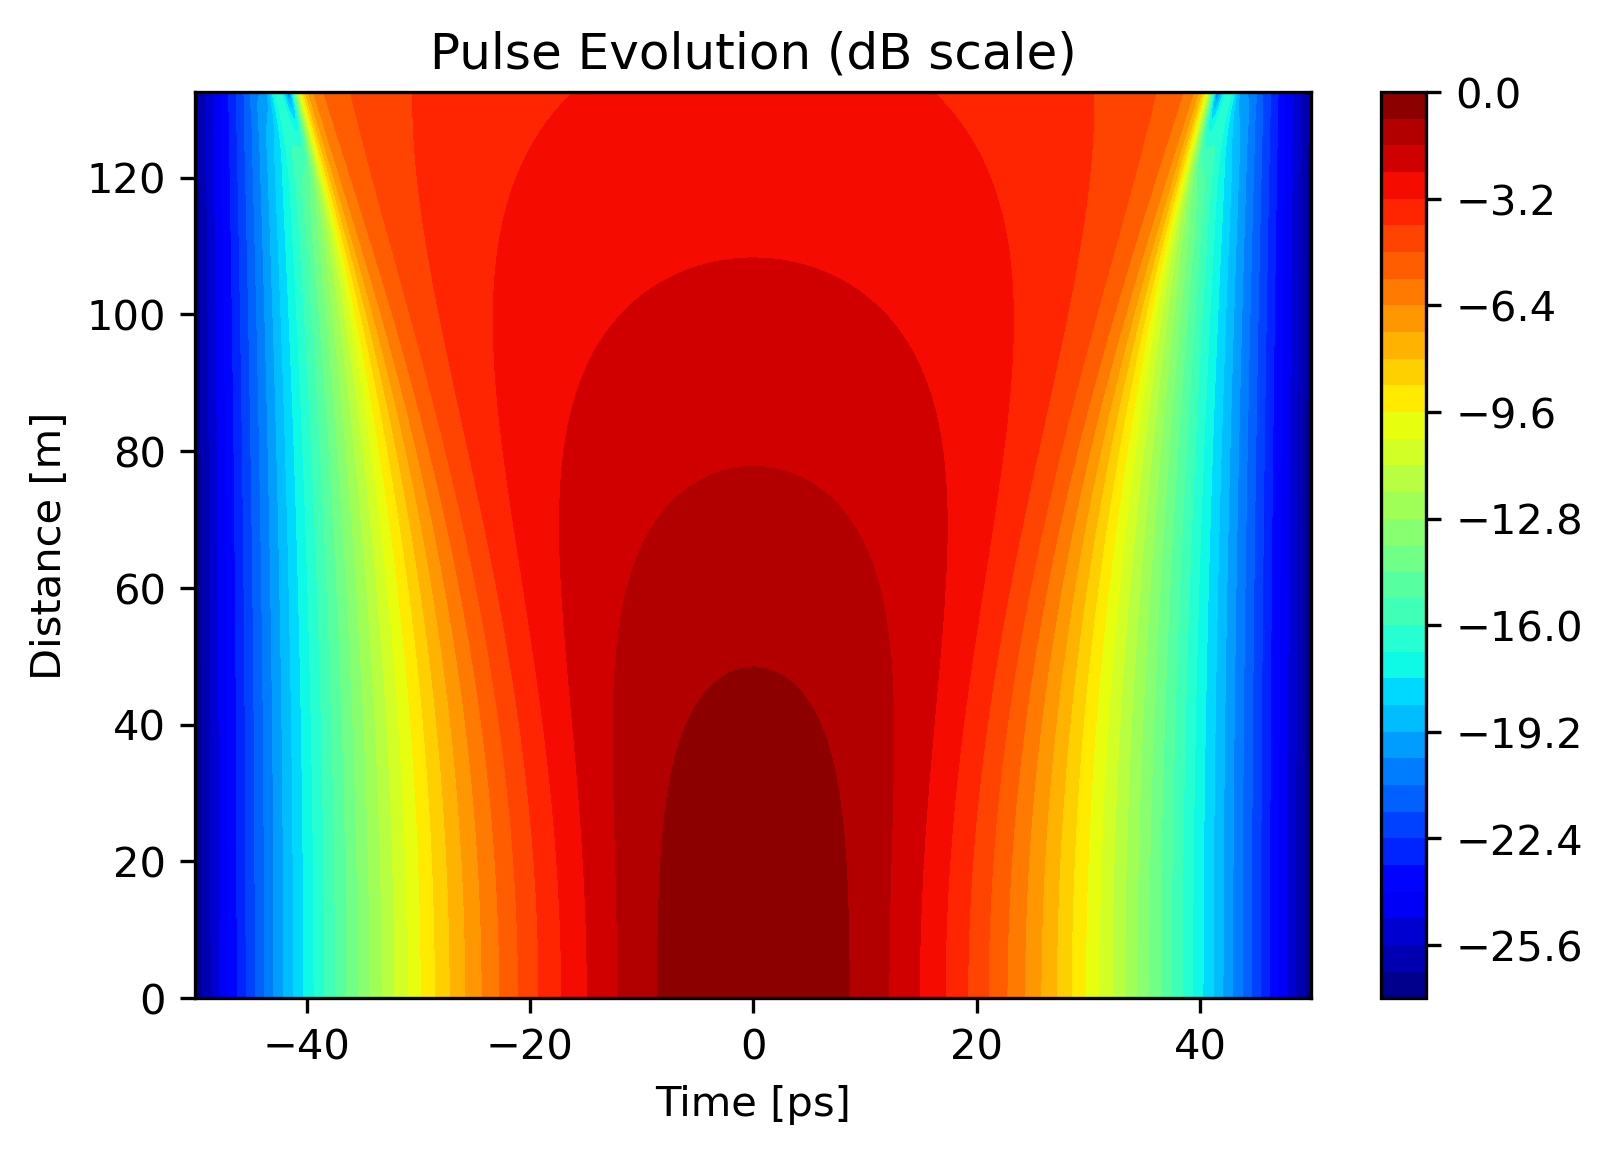

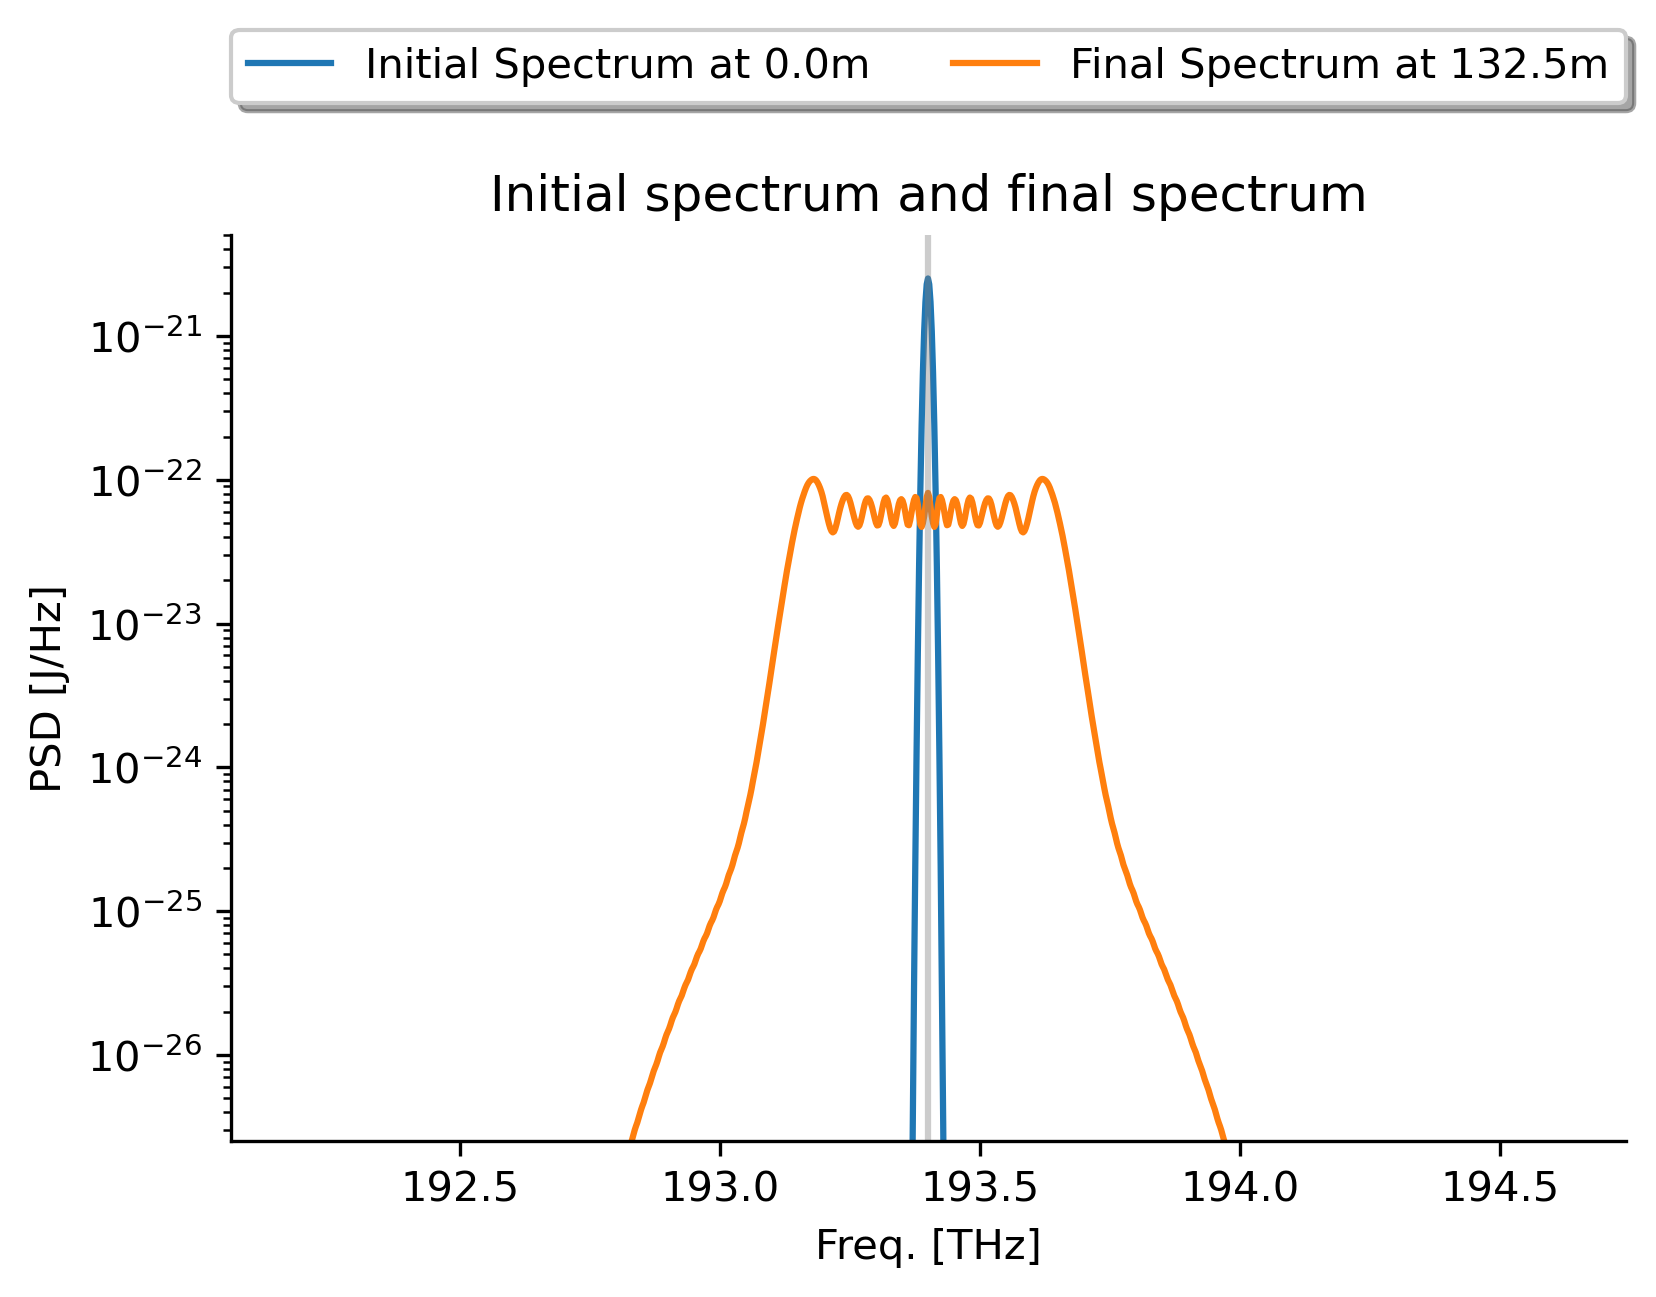

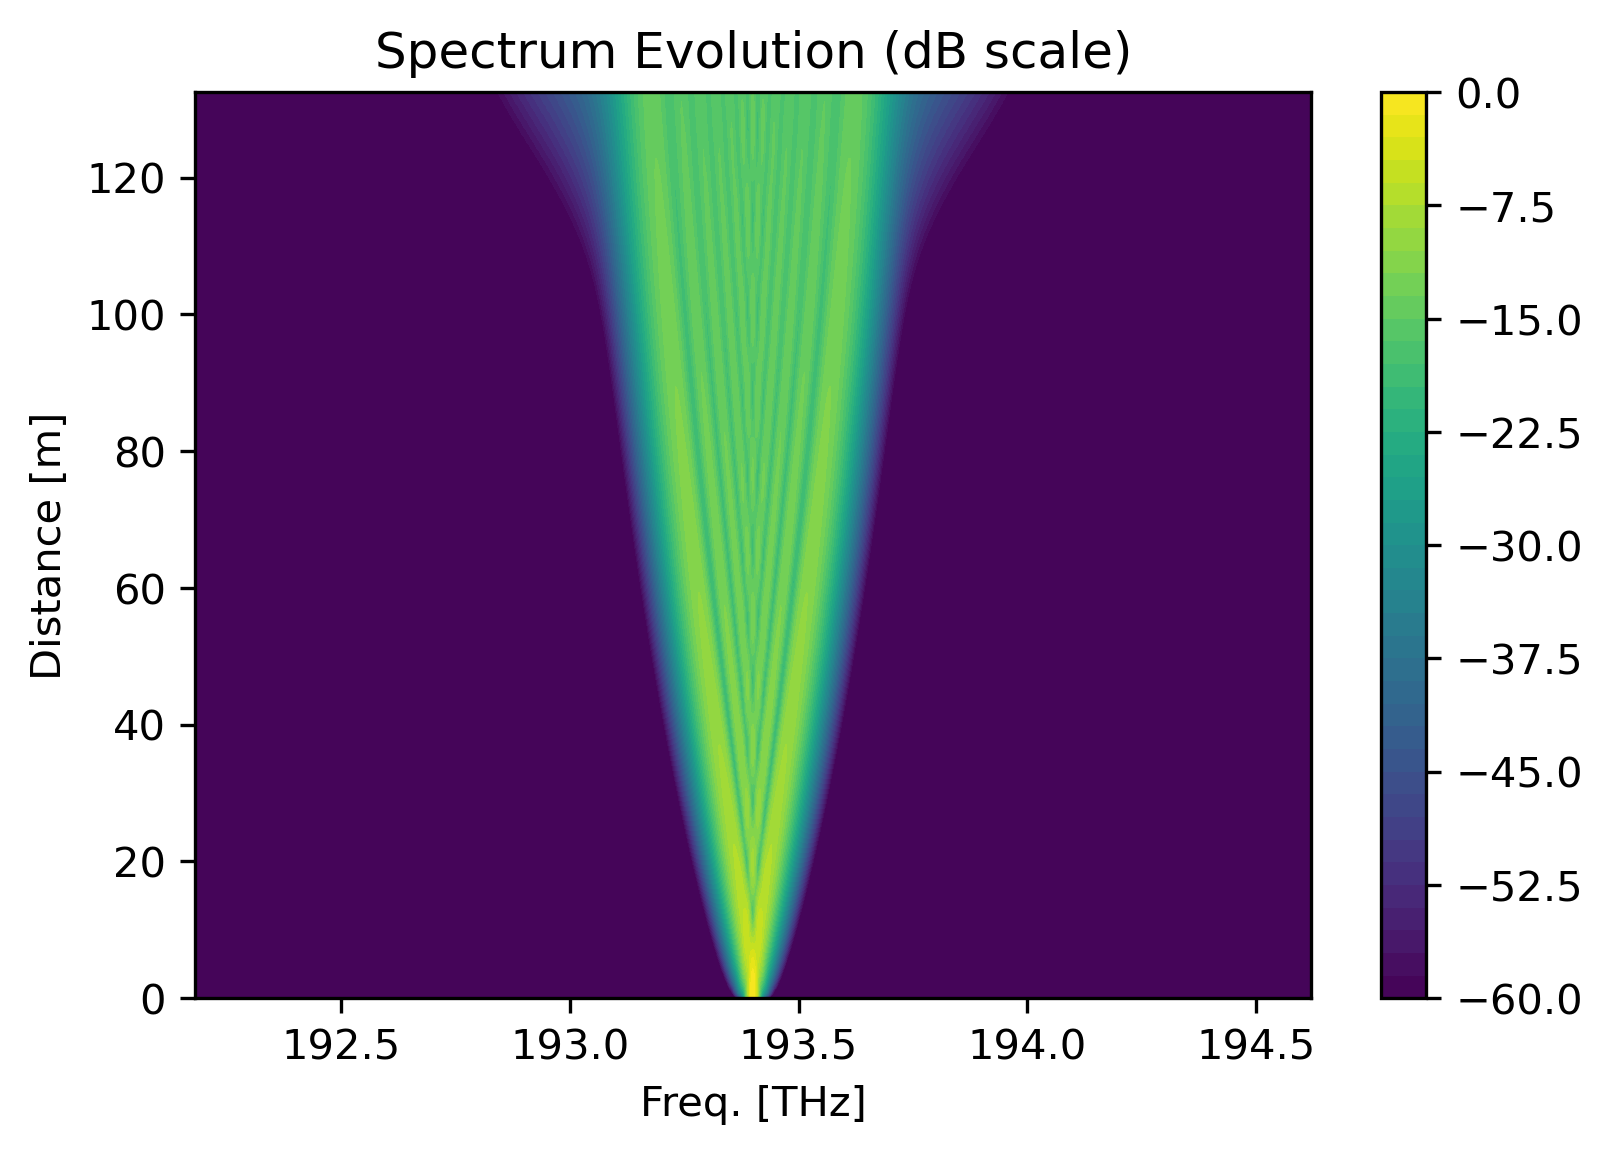

In [17]:
#Plot pulses
nrange_test=500
cutoff_test=-30
plot_everything_about_pulses(ssfm_result_test,nrange_test,cutoff_test,chirpPlotRange=(-600,600))

#Plot spectra
nrange_test=500
cutoff_test=-60    
plot_everything_about_spectra(ssfm_result_test,nrange_test,cutoff_test)